In [ ]:
#Exercise 1 : Understanding the problem and Data Collection
import numpy as np
import pandas as pd

from google.colab import files

uploaded = files.upload() ##upload the file

df = pd.read_csv("diabetes_prediction_dataset.csv")

print(df.shape)
print(df.head())

print(df['diabetes'].value_counts())
#there are 91500 negative cases and 8500 positive cases of diabetes.

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv
(100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
diabetes
0    91500
1     8500
Name: count, dtype: int64


In [ ]:
X = df.drop(columns=['diabetes']) #target
y = df['diabetes']

X_encoded = pd.get_dummies(X, columns=['gender', 'smoking_history'], drop_first=True) #onehot encoding bec the two columns are objects

print(X_encoded.head())
print(X_encoded.info())  # all numeric now


    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   gender_Male  gender_Other  smoking_history_current  smoking_history_ever  \
0        False         False                    False                 False   
1        False         False                    False                 False   
2         True         False                    False                 False   
3        False         False                     True                 False   
4         True         False                     True                 False   

   smoking_history_former  smoking_his

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

##Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

#Exercise 2: Model Picking and Standardization

## we should make the Logistic Regression because of the binary option.

model = LogisticRegression(max_iter=2000, random_state=42)

##we should go with the Standardscaler because this model has a lot of features and they're all at different scales.

scaler = StandardScaler(with_mean=False)
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
#Exercise 3 - Train the model
model.fit(X_train, y_train.values.ravel())

pred = model.predict(X_test)

Accuracy: 0.9604


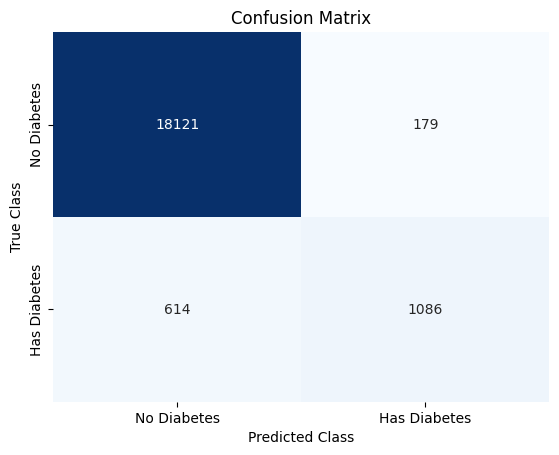

Sensitivity/Recall for Logistic Regression Model 1 : 0.64
F1 Score for Logistic Regression Model 1 : 0.73


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score, recall_score
#Exercise 4 : Evaluation Metrics

accuracy = accuracy_score(y_test, pred) # Calculate accuracy score
print(f"Accuracy: {accuracy:.4f}")

#RESULTS: Logistics Regression model correctly predicts if patient has diabetes with 96% accuracy.

class_names = ['No Diabetes', 'Has Diabetes'] #confusion matrix
matrix = confusion_matrix(y_test, pred)

##RESULTS: True Negative (Top-Left) 18121 cases of non-diabetic patients were correctly predicted as non-diabetic.

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

f1_score = round(f1_score(y_test, pred), 2) #calculate F1 Score
recall_score = round(recall_score(y_test, pred), 2) #calculate recall score

print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

##RESULTS: F1 of 73% means its balanced but really could improve.

##RESULTS: Recall: 64% which means it missed some cases.


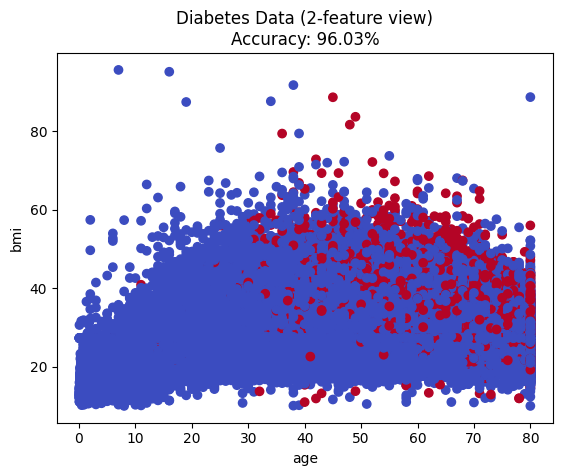

In [17]:
#Exercise 5: Visualize Decision Boundary with Accuracy

# Visualize the data
plt.scatter(df['age'], df['bmi'], c=df['diabetes'], cmap='coolwarm')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title(f'Diabetes Data (2-feature view)\nAccuracy: {accuracy:.2%}')
plt.show()

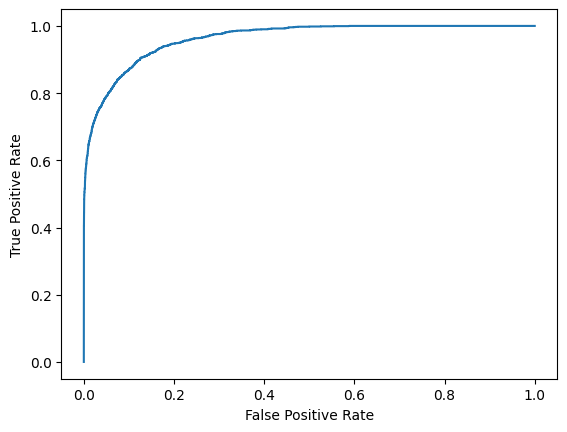

In [14]:
#Exercise 6 : ROC Curve

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Does well up to a certain point (between .9)